Viewing classes in Directory

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_address = "D:/Garbage-Classification/Dataset"

classes = os.listdir(dir_address)
print(classes)

['test', 'train']


In [2]:
dir_address = "D:/Garbage-Classification/Dataset/train"

train_classes = os.listdir(dir_address)
print(train_classes)

['glass', 'metal', 'paper', 'plastic', 'trash']


Visualizing Images in Dataset from each class

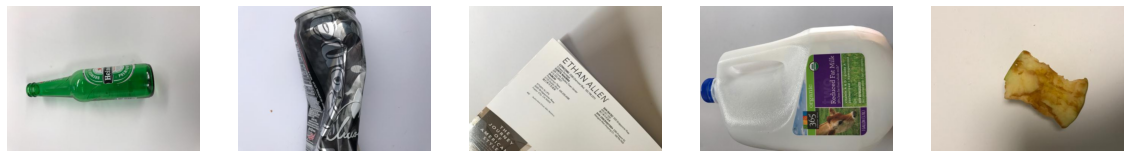

In [3]:
dir_with_examples = 'D:/Garbage-Classification/visualize'
files_per_row = 5
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

Importing required Libraries for Model

In [4]:

from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import scipy
from scipy import ndimage
try:
    import scipy
    print(scipy.__version__)
    #scipy.ndimage cannot be accessed until explicitly imported
    print(ndimage.affine_transform.__doc__)
    from scipy import ndimage

except ImportError as e:
    print('test............',e)
    scipy = None

1.8.1

    Apply an affine transformation.

    Given an output image pixel index vector ``o``, the pixel value
    is determined from the input image at position
    ``np.dot(matrix, o) + offset``.

    This does 'pull' (or 'backward') resampling, transforming the output space
    to the input to locate data. Affine transformations are often described in
    the 'push' (or 'forward') direction, transforming input to output. If you
    have a matrix for the 'push' transformation, use its inverse
    (:func:`numpy.linalg.inv`) in this function.

    Parameters
    ----------
    input : array_like
        The input array.
    matrix : ndarray
        The inverse coordinate transformation matrix, mapping output
        coordinates to input coordinates. If ``ndim`` is the number of
        dimensions of ``input``, the given matrix must have one of the
        following shapes:

            - ``(ndim, ndim)``: the linear transformation matrix for each
              output coordinate.
     

Data Configuration

In [6]:
train = "D:/Garbage-Classification/Dataset/train"
test = "D:/Garbage-Classification/Dataset/test"

Creating a Generator for Training Set

In [7]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2173 images belonging to 5 classes.
{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3, 'trash': 4} 

{0: 'glass', 1: 'metal', 2: 'paper', 3: 'plastic', 4: 'trash'}


Creating a Generator for Testing Set

In [8]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 354 images belonging to 5 classes.
{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3, 'trash': 4} 

{0: 'glass', 1: 'metal', 2: 'paper', 3: 'plastic', 4: 'trash'}


In [9]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [10]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

Writing the labels into a text file 'Labels.txt '

In [11]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3, 'trash': 4}


Model Architecture

In [12]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

Model Compilation

In [13]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Training the Model (batch_size = 32, epochs = 10)

In [ ]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

Epoch 1/10


C:\Users\Siyu\AppData\Local\Temp\ipykernel_3688\3549247296.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


68/68 [==============================] - 83s 1s/step - loss: 1.5393 - accuracy: 0.3525
Epoch 2/10
68/68 [==============================] - 78s 1s/step - loss: 1.3724 - accuracy: 0.4271
Epoch 3/10
68/68 [==============================] - 80s 1s/step - loss: 1.2478 - accuracy: 0.4841
Epoch 4/10
68/68 [==============================] - 84s 1s/step - loss: 1.1391 - accuracy: 0.5209
Epoch 5/10
 4/68 [>.............................] - ETA: 1:28 - loss: 1.0757 - accuracy: 0.5547

Testing Predictions

In [ ]:
import keras
import numpy as np
test_img = 'D:/Garbage-Classification/Dataset/test/metal/metal364.jpg'
img = keras.utils.load_img(test_img, target_size = (300,300))
img = keras.utils.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

In [ ]:
test_img = 'D:/Garbage-Classification/Dataset/test/glass/glass421.jpg'
img = keras.utils.load_img(test_img, target_size = (300,300))
img = keras.utils.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

In [ ]:
test_img = 'D:/Garbage-Classification/Dataset/test/plastic/plastic425.jpg'
img = keras.utils.load_img(test_img, target_size = (300,300))
img = keras.utils.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

Saving model as 'model.h5'

In [ ]:
model.save('weights/model.h5')